# Boosting Trees

In [1]:
%matplotlib inline
from pylab import *
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

## Gradient Boosting 

Commencons ajuster un regresseur par gradient boosting sur des familles d'arbres.

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

In [3]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


####  Préparation des données Housing

In [7]:
X_housing = california_housing.data
Y_housing = california_housing.target
print(shape(X_housing))
display(X_housing)
display(Y_housing)

(20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

Pour éviter que les temps de calcul soient trop longs, nous allons travailler avec un sous échantillon:

In [6]:
from sklearn.utils import resample
X_housing, Y_housing  = resample(X_housing,Y_housing, n_samples = 2000, replace = False)

Découpage train / test :

In [7]:
X_housing_train, X_housing_test, y_housing_train, y_housing_test = \
train_test_split(X_housing,Y_housing,test_size=0.5)

Importation des fonctions Gradient Boosting de sckit-learn et de la fonction `mean_squared_error` pour le calcul des erreurs quadratique moyennes.

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Nous ajustons maintenant un modèle GBM avec les paramètres proposés ci-dessous.

> Retrouver la signification de chacun des paramètres.

In [9]:
GBM = GradientBoostingRegressor(n_estimators=500,
                                         max_depth=8,
                                         min_samples_split= 4,
                                         learning_rate=0.1,
                                         loss='squared_error')
print(GBM)

GradientBoostingRegressor(max_depth=8, min_samples_split=4, n_estimators=500)


Pour calculer l'erreur mse sur le test (aussi appelée deviance dans la doc) :

In [10]:
GBM.fit(X_housing_train, y_housing_train)
mse = mean_squared_error(y_housing_test,
                         GBM.predict(X_housing_test))
print(mse)

0.41265724843034224


Attention : le score renvoyé ci-dessous est un $R^2$ i.e. variance expliquée par le prédicteur / variance totale de $Y$, voir [ici](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination).

In [11]:
print(GBM.score(X_housing_test, y_housing_test))

0.7029426860580472


Quelques principes à retenir:
+ Plus on ajuste d'arbres, plus le cout computationnel est élevé.
+ le nombre d'arbres correspond au nombre d'itérations.
+ Un taux d'apprentissage petit nécessitera plus d'arbres.
+ Un taux d'apprentissage trop élevé fera des sauts de gradients potentiellement trop grands, et au bout d'un certain nombre d'itérations il sera  difficile d'améliorer les scores.
+ Une bonne pratique consiste à choisir d'abord un taux d'apprentissage pas trop faible (pour ne pas faire exploser le nombre d'arbres) et à le diminuer ensuite, une fois ajustés les autres paramètres (nb de noeuds, profondeur ...).

#### Etude des erreurs le long des itérations -  learning rate

Nous allons maintenant étudier l'évolution de la perte en fonction du nombre d'itérations.

Noter que l'erreur d'apprentissage est accessible dans GBM:

In [12]:
print(GBM.train_score_)

[1.04357627e+00 8.73302943e-01 7.37059884e-01 6.21691036e-01
 5.24950068e-01 4.41812990e-01 3.76829598e-01 3.19625698e-01
 2.71658693e-01 2.33849405e-01 2.01417371e-01 1.76518884e-01
 1.51719424e-01 1.32234175e-01 1.15370126e-01 1.01835882e-01
 8.84022742e-02 7.81591410e-02 6.92308452e-02 6.11374189e-02
 5.41530970e-02 4.86334976e-02 4.35608493e-02 3.90200488e-02
 3.48362675e-02 3.15288606e-02 2.86110825e-02 2.64804072e-02
 2.40699002e-02 2.20844780e-02 2.04642498e-02 1.88915826e-02
 1.74505958e-02 1.62849629e-02 1.54039505e-02 1.45269593e-02
 1.34940935e-02 1.25100807e-02 1.16197876e-02 1.09639713e-02
 1.05412394e-02 9.86932601e-03 9.20627718e-03 8.79469582e-03
 8.28401578e-03 7.99068828e-03 7.48681572e-03 7.11606720e-03
 6.83653988e-03 6.36010089e-03 6.16461802e-03 5.91964940e-03
 5.75951441e-03 5.31949236e-03 5.08559727e-03 4.76575710e-03
 4.58250599e-03 4.40300530e-03 4.21021288e-03 4.08074510e-03
 3.88392431e-03 3.60037190e-03 3.43108525e-03 3.21042109e-03
 2.99725530e-03 2.869052

Nous pouvons aussi tracer l'évolution de l'erreur de test mse (ou bien le score $R^2$) le long des itérations. En effet, pour retrouver tous les estimateurs temporaires à chaque de l'étape de l'algo, il suffit de considérer la somme tronquée du prédicteur boosting final. 
> Utiliser les méthodes `staged_predict()` et `loss_()` de la classe `GradientBoostingRegressor` pour afficher l'erreur de test en fonction du nombre d'itérations. Comparer avec l'erreur sur le train. 


500

ValueError: x and y must have same first dimension, but have shapes (500,) and (0,)

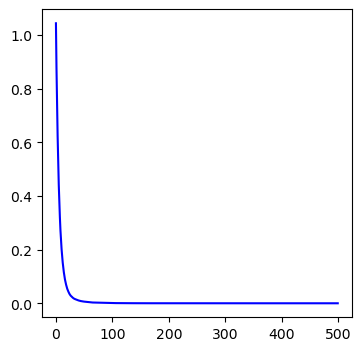

In [13]:
target_pred = GBM.staged_predict(X = X_housing_test)
loss = []
# for i in target_pred:
#     loss.append(GBM.loss_(y = y_housing_test, raw_predictions = target_pred))

plt.figure(figsize=(4,4))
plt.plot(range(GBM.n_estimators_), GBM.train_score_, 'b-', label = 'Training score')
plt.plot(range(GBM.n_estimators_), loss, 'r-', label = 'Test MSE')
plt.legend()
plt.show()

> Est il nécessaire ici de faire du "early stopping" i.e. considérer une somme tronquée du prédicteur boosting pour contrôler le sur-apprentissage ?

In [14]:
# Early stopping support in Gradient Boosting enables us to find the least number of iterations
# which is sufficient to build a model that generalizes well to unseen data.

# The concept of early stopping is simple. 
# We specify a validation_fraction which denotes the fraction of the whole dataset 
# that will be kept aside from training to assess the validation loss of the model. 
# The gradient boosting model is trained using the training set and evaluated using the validation set. 
# When each additional stage of regression tree is added, the validation set is used to score the model. 
# This is continued until the scores of the model in the last n_iter_no_change stages 
# do not improve by at least tol. After that the model is considered to have converged 
# and further addition of stages is “stopped early”.

> Superposer quelques trajectoires pour plusieurs valeurs du learning rate.

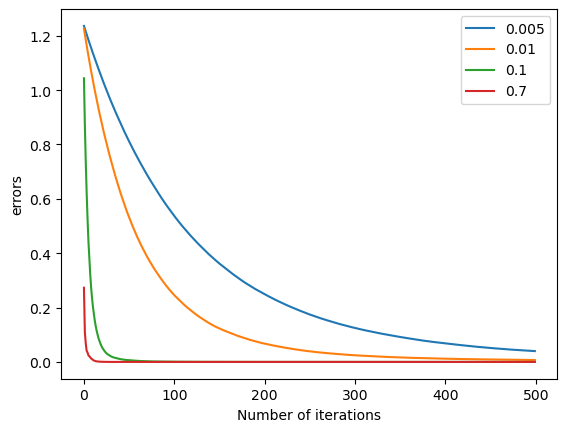

In [15]:
learning_rate = [0.005, 0.01, 0.1, 0.7]
mse_i = []
for i in learning_rate:
    GBM_i = GradientBoostingRegressor(n_estimators=500,
                                      learning_rate=i,
                                      max_depth=8,
                                      min_samples_split=4,
                                      loss='squared_error')
    GBM_i.fit(X_housing_train, y_housing_train)
    plt.plot(range(GBM_i.n_estimators_), GBM_i.train_score_, label = i)
    # plt.plot(range(GBM_i.n_estimators_), GBM_i.staged_predict)
plt.xlabel("Number of iterations")
plt.ylabel("errors")
plt.legend(learning_rate)
plt.show()

#### Choix des paramètres du GBM

> Pour `n_estimators=300` et `learning_rate=0.1`, effectuer une recherche avec par `GridSearch()` pour choisir `max_depth` et  `min_samples_split`. Faire cette recherche en "cross validant" uniquement l'échantillon d'apprentissage de façon à garder des données pour évaluer les performances du modèle finalement sélectionné.

In [16]:
from sklearn.model_selection import GridSearchCV
GBM_300 = GradientBoostingRegressor(n_estimators=300,
                                    learning_rate=0.1,
                                    loss = 'squared_error')
param = {'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 3, 4]}
gridcv = GridSearchCV(estimator=GBM_300,
                  param_grid=param,
                  cv = 5)
gridcv.fit(X_housing_train, y_housing_train)

max_depth = gridcv.best_params_['max_depth']
min_samples_split = gridcv.best_params_['min_samples_split']

> Une fois ces valeurs choisies, diminuer le learning rate et augmenter le nombre d'itérations pour essayer d'améliorer encore les performances.

In [41]:
print(max_depth)

print(min_samples_split)


4
3


> Calculer le $R^2$ et l'erreur de test pour le modèle final

In [42]:
from sklearn.metrics import r2_score
GBM_new = GradientBoostingRegressor(n_estimators=500,
                                    max_depth=max_depth,
                                    min_samples_split=min_samples_split,
                                    learning_rate=0.05,
                                    loss = 'squared_error')

GBM_new.fit(X_housing_train, y_housing_train)
mse = mean_squared_error(y_housing_test, GBM_new.predict(X_housing_test))
r2 = 1 - mse /np.var(y_housing_test)
r2_ = r2_score(y_housing_test, GBM_new.predict(X_housing_test))


#### Indices d'importance

> Il est aussi possible de calculer des indices d'importances pour les GMB avec la méthode `feature_importances_`.  

In [44]:
GBM_new.feature_importances_

array([0.53447541, 0.0558966 , 0.0629135 , 0.02169894, 0.0343678 ,
       0.14137264, 0.07291823, 0.07635688])

##  XGboost

Si nécessaire, installer la librairie `xgboost`. Importer cette librairie.

In [45]:
from xgboost import XGBRegressor

Nous allons utilser Xgboost avec pour classifieurs faibles des arbres (on pourait aussi utiliser aussi des modèles linéaires basés sur peu de variabes).

Les paramètres de Xgboost, notamment pour les fonctions `XGBRegressor()` et `XGBClassifier()`, sont décrits dans [cette page](http://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn). Elles sont similaires aux commdandes des fonctions de sckit-learn.

In [46]:
XGBR = XGBRegressor()
XGBR.fit(X_housing_train, y_housing_train)
y_pred = XGBR.predict(X_housing_test)
XGBR

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

> Donner le score $R^2$ et l'erreur mse. Comparer avec GBM.

In [56]:
r2_xgb = r2_score(y_housing_test, y_pred)
mse = mean_squared_error(y_housing_test, y_pred)


Les remarques précedentes sur les reglages des paramètres de GBM sont encore vraies pour Xgboost. Il faut en plus ajuster les paramètres `alpha`  et `lambda` des termes de régularisation.

> Choisir les paramètres de Xgboost.

In [58]:
params = {'reg_alpha': [0, 0.01, 0.1, 1],
          'reg_lambda': [0, 0.01, 0.1, 1],
          'max_depth': [2, 4, 6, 8]}

gridcv_XGB = GridSearchCV(estimator=XGBR,
                          param_grid=params,
                          cv = 5)
gridcv_XGB.fit(X_housing_train, y_housing_train)

reg_alpha_best = gridcv_XGB.best_params_['reg_alpha']
reg_lambda_best = gridcv_XGB.best_params_['reg_lambda']
max_depth_best = gridcv_XGB.best_params_['max_depth']

print(f"reg_alpha_best = {reg_alpha_best}\n"
      f"reg_lambda_best = {reg_lambda_best}\n"
      f"max_depth_best = {max_depth_best}\n")

reg_alpha_best = 1
reg_lambda_best = 1
max_depth_best = 4



## Comparaison des algorithmes (Bonus)

Adaboost est implémenté en sklearn par la fonction [`AdaBoostClassifier()`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html).

> Comparer les performances des algos AdaBoost, GBM et XGBoost sur les données Spam pour un nombre d'arbres variant entre 10 et 1000 (ne pas considérer tous les entiers). Vous pourrez notamment comparer vos résultats avec les résultats anoncées dans [EOSL p.589]

## Implémentation du Boosting Regressor  (Bonus) 

> Implémenter votre propore fonction Tree Boosting Regressor, on considérant la perte $\ell_2$. On pourra pour cela, à chaque itération, 
ajuster un arbre de régression (de faible prodondeur) sur les résidus courants, à l'aide de la fonction `tree.DecisionTreeRegressor()` . L'étape 5 de l'Algorithme 6 "Gradient Tree Boosting Regressor Algorithm" donné en cours est-elle nécessaire dans ce contexte ? 


In [ ]:
### TO DO ###